In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load your dataset
file_path = "/content/Final_Data.csv"  # Update the path as needed
data = pd.read_csv(file_path)

# Combine all the relevant columns into one
textual_columns = [
    "Cleaned_JD_Qualifications",
    "Cleaned_JD_Preference",
    "Cleaned_JD_Job_Title",
    "Cleaned_JD_Role",
    "Cleaned_JD_Job_Description",
    "Cleaned_JD_skills",
    "Cleaned_JD_Responsibilities",
    "Resume_Score",
]
data['Combined_Text'] = data[textual_columns].astype(str).apply(lambda x: ' '.join(x), axis=1)

# Extract the 'Cleaned_Resume_information' column and the combined text column
combined_text = data['Combined_Text']
resume_information = data['Cleaned_Resume_information']

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features = 150)

# Fit and transform the combined text and resume information columns
combined_text_tfidf = vectorizer.fit_transform(combined_text)
resume_information_tfidf = vectorizer.transform(resume_information)

# Compute cosine similarity between the combined text and resume information
cosine_similarities = cosine_similarity(combined_text_tfidf, resume_information_tfidf)

# Display the resulting cosine similarity for each row
data['Cosine_Similarity'] = [cosine_similarities[i, i] for i in range(len(cosine_similarities))]

# Output the DataFrame with the cosine similarity scores
data[['Combined_Text', 'Cleaned_Resume_information', 'Cosine_Similarity']].head()

,Combined_Text,Cleaned_Resume_information,Cosine_Similarity
0,bca male electrical designer electrical engine...,skills programming languages python pandas num...,0.264661
1,phd female urban planner city planner city pla...,skills programming languages python pandas num...,0.162405
2,ba female structural engineer construction eng...,skills programming languages python pandas num...,0.148067
3,bca female graphic designer uiux designer uiux...,skills programming languages python pandas num...,0.280938
4,ba female marketing coordinator marketing spec...,skills programming languages python pandas num...,0.214543


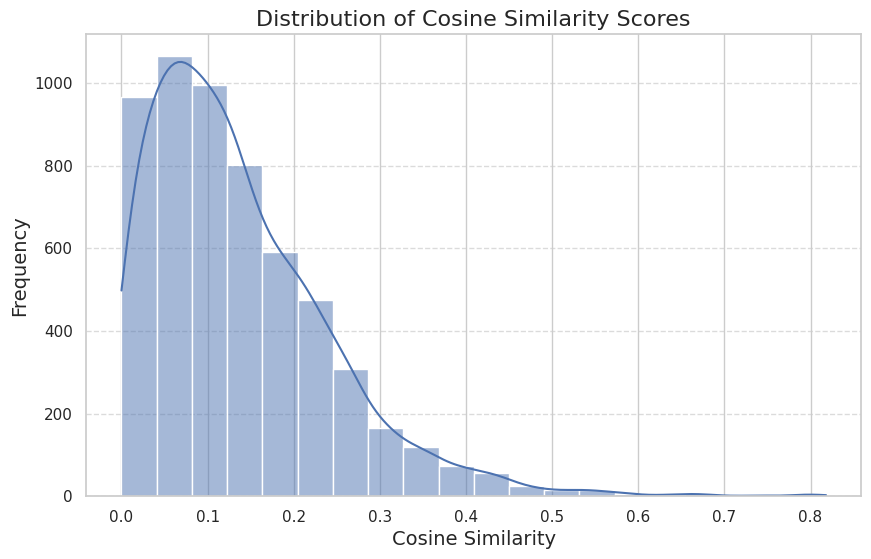

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the Cosine Similarity scores
plt.figure(figsize=(10, 6))

# Using a histogram to visualize the distribution of cosine similarity scores
sns.histplot(data['Cosine_Similarity'], bins=20, kde=True)
plt.title("Distribution of Cosine Similarity Scores", fontsize=16)
plt.xlabel("Cosine Similarity", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


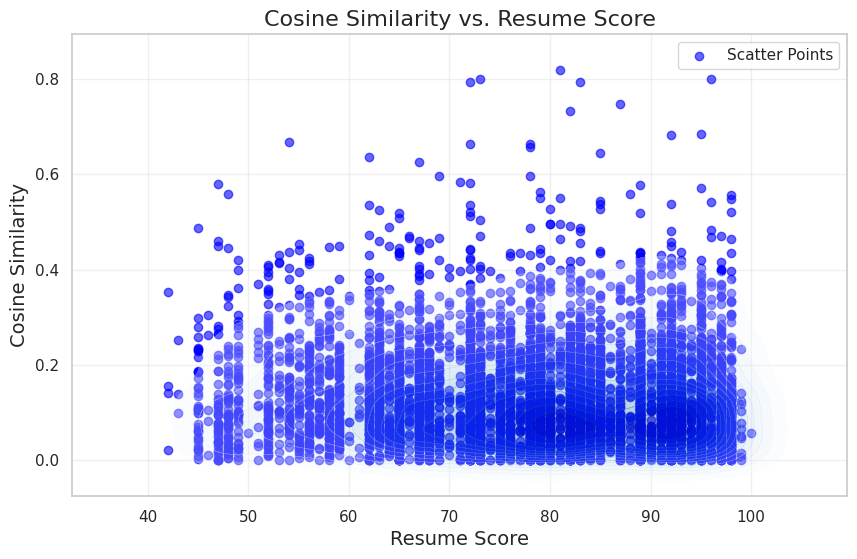

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter Plot: Cosine Similarity vs Resume Score
plt.figure(figsize=(10, 6))
plt.scatter(data['Resume_Score'], data['Cosine_Similarity'], alpha=0.6, color='blue', label="Scatter Points")

# Add KDE plot
sns.kdeplot(x=data['Resume_Score'], y=data['Cosine_Similarity'], cmap="Blues", fill=True, alpha=0.3, levels=15, label="KDE Density")

# Add titles and labels
plt.title("Cosine Similarity vs. Resume Score", fontsize=16)
plt.xlabel("Resume Score", fontsize=14)
plt.ylabel("Cosine Similarity", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [41]:
# Calculate the correlation between cosine_similarity and resume_score
correlation = data['Cosine_Similarity'].corr(data['Resume_Score'])

# Print the correlation value
print(f"Correlation between cosine similarity and resume score: {correlation}")

Correlation between cosine similarity and resume score: -0.030789388174590107
